In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
import numpy as np
import os

In [32]:
dataset_dir = r"C:\Users\mark kevin\Downloads\images\Images"

In [33]:
train_ds = image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

Found 10005 files belonging to 56 classes.
Using 8004 files for training.


In [34]:
val_ds = image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

Found 10005 files belonging to 56 classes.
Using 2001 files for validation.


In [35]:
class_names = train_ds.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_terrier', 'n02095314-wire-haired_fox_terrier', 'n020955

In [36]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
model = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  
])


C:\Users\mark kevin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [39]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 194ms/step - accuracy: 0.0214 - loss: 31.6399 - val_accuracy: 0.0255 - val_loss: 4.0245
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 46s 181ms/step - accuracy: 0.0506 - loss: 3.9720 - val_accuracy: 0.0265 - val_loss: 4.0266
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 46s 185ms/step - accuracy: 0.1285 - loss: 3.6070 - val_accuracy: 0.0325 - val_loss: 4.2699
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 46s 184ms/step - accuracy: 0.2928 - loss: 2.8877 - val_accuracy: 0.0390 - val_loss: 4.8564
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 47s 186ms/step - accuracy: 0.4706 - loss: 2.1469 - val_accuracy: 0.0395 - val_loss: 6.0333
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 46s 184ms/step - accuracy: 0.6137 - loss: 1.5691 - val_accuracy: 0.0415 - val_loss: 7.8497
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 48s 193ms/step - accuracy: 0.7307 - loss: 1.1137 - val_accuracy: 0.0515 - val_loss: 9.4462
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.7660 - loss: 

In [40]:
import matplotlib.pyplot as plt
def predict_and_display_breed(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]

    plt.imshow(img)
    plt.title(f'Predicted breed: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class


In [60]:
image_path =r"C:\Users\mark kevin\Pictures\Screenshots\Screenshot 2024-06-29 070405.png"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


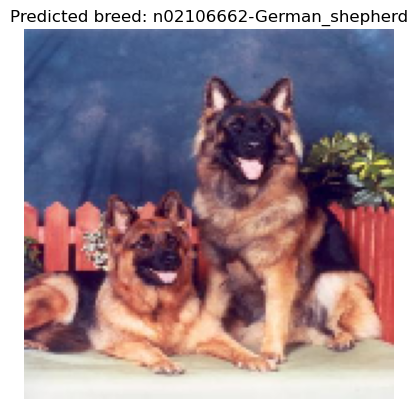

Predicted breed: n02106662-German_shepherd


In [61]:
predicted_breed = predict_and_display_breed(image_path)
print(f'Predicted breed: {predicted_breed}')


In [45]:
# Save your model
model.save('my_model.h5')

